This file will serve as an analysis tool for efficiency comparisons.

We will need these packages for visualization

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

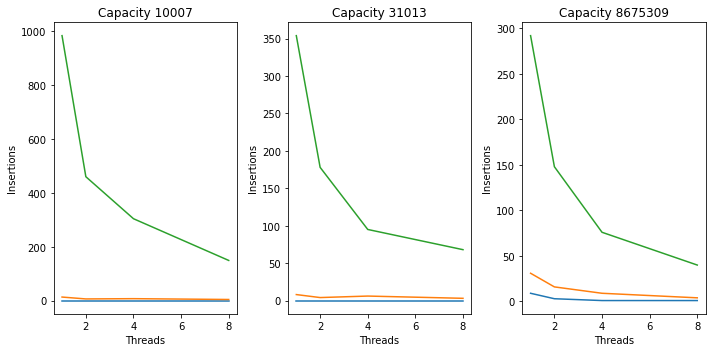

In [38]:
hashmap_file = 'data/hashmap.csv'
hashmap_data = pd.read_csv(hashmap_file)

caps = [10_007, 31_013, 8_675_309]
lims = [10_000, 100_000, 1_000_000]

caps_data = []
for cap in caps:
    caps_data.append(hashmap_data[hashmap_data['capacity'] == cap])
        
plt.figure(figsize=(10, 5))
for index, cap in enumerate(caps):
    plt.subplot(1, len(caps), index + 1)
    plt.title(f"Capacity {cap}")
    plt.xlabel('Threads')
    plt.ylabel('Insertions')
    for lim in lims:
        plt.plot('threads', 'runtime', data = caps_data[index][caps_data[index]['limit'] == lim])

plt.tight_layout()
plt.show()